In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
train_path = "data/cleaned_train_dataset.csv"    
train_df = pd.read_csv(train_path)
features= ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']
target= 'SalePrice'
X = train_df[features].fillna(0)
y = train_df[target]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.20, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred= model.predict(X_val)
print("R²  :", round(r2_score(y_val, y_pred), 3))
print("RMSE:", round(np.sqrt(mean_squared_error(y_val, y_pred)), 2))
model.fit(X, y)

R²  : 0.634
RMSE: 53018.33


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
test_path  = "data/cleaned_test_dataset.csv"
test_df  = pd.read_csv(test_path)
X_test = test_df[features].fillna(0)
test_df['SalePrice'] = model.predict(X_test)
print("Rsqure:", round(r2_score(y_val, y_pred), 3))
print("RMSE:", round(np.sqrt(mean_squared_error(y_val, y_pred)), 2))

Rsqure: 0.634
RMSE: 53018.33


In [10]:
from IPython.display import FileLink
submission = test_df[['Id', 'SalePrice']]
submission.to_csv("linear_regression_submission.csv", index=False)
print("Saved submission: linear_regression_submission.csv")
FileLink('linear_regression_submission.csv')

Saved submission: linear_regression_submission.csv


/workspaces/PRODIGY_ML_01/linear_regression_submission.csv

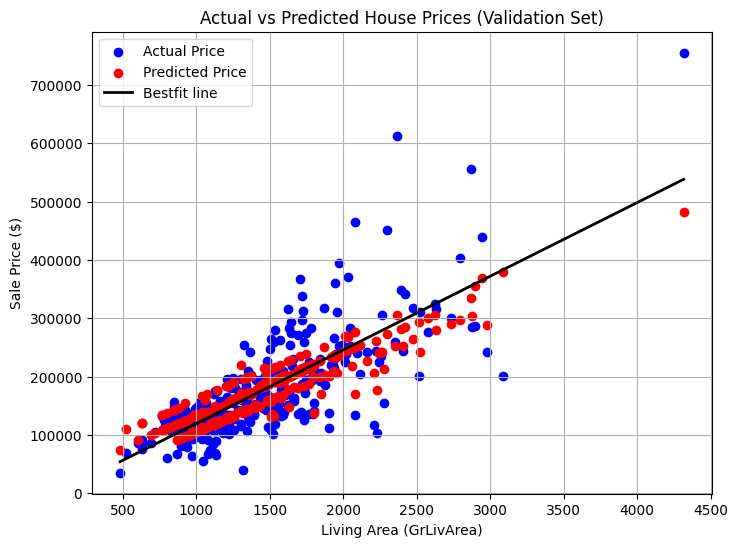

PREDECTED :
Rsqure: 0.634
RMSE: 53018.33


In [11]:
from matplotlib import pyplot as plt
m, b = np.polyfit(X_val['GrLivArea'], y_val, deg=1)
x_line = np.linspace(X_val['GrLivArea'].min(), X_val['GrLivArea'].max(), 100)
y_line = m * x_line + b
plt.figure(figsize=(8,6))
plt.scatter(X_val['GrLivArea'], y_val,  color='blue',  label='Actual Price')
plt.scatter(X_val['GrLivArea'], y_pred,  color='red',   label='Predicted Price')
plt.plot(x_line, y_line, color='black', linewidth=2, label='Bestfit line')
plt.xlabel('Living Area (GrLivArea)')
plt.ylabel('Sale Price ($)')
plt.title('Actual vs Predicted House Prices (Validation Set)')
plt.legend()
plt.grid(True)
plt.show()
print('PREDECTED :')
print("Rsqure:", round(r2_score(y_val, y_pred), 3))
print("RMSE:", round(np.sqrt(mean_squared_error(y_val, y_pred)), 2))